In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier, BaggingClassifier, VotingClassifier

In [171]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Test.csv')
sample = pd.read_excel(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Sample_Submission.xlsx')

In [172]:
train.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [173]:
test.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,0,1,1,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,1,1,0,1,0,0,0,1,0,0,0
3,2,0,0,0,1,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,1,1,0,0,0


In [174]:
train.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
test.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,1.295812,0.120419,0.793194,0.054974,0.892670,0.052356,0.060209,0.107330,0.924084,0.005236,0.020942,0.031414
std,0.511221,0.325878,0.405547,0.228228,0.309938,0.223036,0.238186,0.309938,0.265211,0.072262,0.143379,0.174662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [176]:
train.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [177]:
test.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
dtype: int64

In [178]:
for c in train.columns :
    print(train[c].value_counts())

1    607
2    256
0     26
Name: Gender, dtype: int64
0    782
1    107
Name: Chain_smoker, dtype: int64
1    745
0    144
Name: Consumes_other_tobacco_products, dtype: int64
0    812
1     77
Name: HighBP, dtype: int64
1    817
0     72
Name: Obese, dtype: int64
0    840
1     49
Name: Diabetes, dtype: int64
0    851
1     38
Name: Metabolic_syndrome, dtype: int64
0    816
1     73
Name: Use_of_stimulant_drugs, dtype: int64
1    823
0     66
Name: Family_history, dtype: int64
0    873
1     16
Name: History_of_preeclampsia, dtype: int64
0    870
1     19
Name: CABG_history, dtype: int64
0    860
1     29
Name: Respiratory_illness, dtype: int64
no     699
yes    190
Name: UnderRisk, dtype: int64


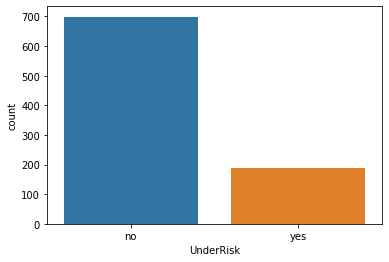

In [179]:
sns.countplot(train.UnderRisk)

In [180]:
tr_dup = train[train.duplicated(keep = False)]
tr_dup.reset_index(drop = True, inplace = True)

dup = train[train.duplicated(keep = False)].index
train.drop(index = dup, inplace = True)
train.reset_index(drop=True, inplace=True)

te_dup = test[test.duplicated(keep = False)]

dup = test[test.duplicated(keep = False)].index
test.drop(index = dup, inplace = True)

In [181]:
tr_dup.shape, train.shape, te_dup.shape, test.shape

((842, 13), (47, 13), (351, 12), (31, 12))

# ANALYSIS

In [182]:
for c in train.columns[:-1]:
    print(train.groupby(c)['UnderRisk'].value_counts(),'\n\n')

Gender  UnderRisk
0       no            6
        yes           2
1       no           18
        yes           4
2       no           10
        yes           7
Name: UnderRisk, dtype: int64 


Chain_smoker  UnderRisk
0             no           23
              yes          10
1             no           11
              yes           3
Name: UnderRisk, dtype: int64 


Consumes_other_tobacco_products  UnderRisk
0                                no           12
                                 yes           3
1                                no           22
                                 yes          10
Name: UnderRisk, dtype: int64 


HighBP  UnderRisk
0       no           26
        yes           7
1       no            8
        yes           6
Name: UnderRisk, dtype: int64 


Obese  UnderRisk
0      no           13
       yes           4
1      no           21
       yes           9
Name: UnderRisk, dtype: int64 


Diabetes  UnderRisk
0         no           27
          yes        

In [183]:
ind_no = []
train = train.groupby('Family_history').get_group(1).reset_index(drop = True)
d = test[test.Family_history==0].index
ind_no.extend(d)
del train['Family_history']
del test['Family_history']
test.drop(index = d, inplace = True)
len(ind_no)

7

In [184]:
train = train.groupby('CABG_history').get_group(0).reset_index(drop = True)
d = test[test.CABG_history==1].index.tolist()
del train['CABG_history']
del test['CABG_history']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

11

### Gen 1 -> Female

In [185]:
train[train.History_of_preeclampsia==1]

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,History_of_preeclampsia,Respiratory_illness,UnderRisk
11,0,0,1,0,1,0,0,0,1,0,no
17,1,0,1,1,1,0,0,0,1,0,no


In [186]:
train.drop(index=11, inplace = True)
train.reset_index(drop = True, inplace = True)

In [187]:
train = train.groupby('History_of_preeclampsia').get_group(0).reset_index(drop = True)
d = test[test.History_of_preeclampsia==1].index.tolist()
del train['History_of_preeclampsia']
del test['History_of_preeclampsia']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

13

chain = []
train = train.groupby('Chain_smoker').get_group(0).reset_index(drop = True)
d = test[test.Chain_smoker==1].index.tolist()
del train['Chain_smoker']
del test['Chain_smoker']
chain.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

In [188]:
for c in tr_dup.columns[:-1]:
    print(tr_dup.groupby(c)['UnderRisk'].value_counts(),'\n\n')

Gender  UnderRisk
0       no            16
        yes            2
1       no           443
        yes          142
2       no           206
        yes           33
Name: UnderRisk, dtype: int64 


Chain_smoker  UnderRisk
0             no           575
              yes          174
1             no            90
              yes            3
Name: UnderRisk, dtype: int64 


Consumes_other_tobacco_products  UnderRisk
0                                no           110
                                 yes           19
1                                no           555
                                 yes          158
Name: UnderRisk, dtype: int64 


HighBP  UnderRisk
0       no           626
        yes          153
1       no            39
        yes           24
Name: UnderRisk, dtype: int64 


Obese  UnderRisk
0      no            46
       yes            9
1      no           619
       yes          168
Name: UnderRisk, dtype: int64 


Diabetes  UnderRisk
0         no           63

In [189]:
ind_no_dupp = []
tr_dup = tr_dup.groupby('Family_history').get_group(1).reset_index(drop = True)
d = te_dup[te_dup.Family_history==0].index
ind_no_dupp.extend(d)
del tr_dup['Family_history']
del te_dup['Family_history']
te_dup.drop(index = d, inplace = True)
len(ind_no_dupp)

22

In [190]:
tr_dup = tr_dup.groupby('CABG_history').get_group(0).reset_index(drop = True)
d = te_dup[te_dup.CABG_history==1].index
ind_no_dupp.extend(d)
del tr_dup['CABG_history']
del te_dup['CABG_history']
te_dup.drop(index = d, inplace = True)
len(ind_no_dupp)

26

In [191]:
tr_dup = tr_dup.groupby('History_of_preeclampsia').get_group(0).reset_index(drop = True)
d = te_dup[te_dup.History_of_preeclampsia==1].index
ind_no_dupp.extend(d)
del tr_dup['History_of_preeclampsia']
del te_dup['History_of_preeclampsia']
te_dup.drop(index = d, inplace = True)
len(ind_no_dupp)

26

In [192]:
del train['Metabolic_syndrome']
del test['Metabolic_syndrome']

del tr_dup['Metabolic_syndrome']
del te_dup['Metabolic_syndrome']

In [193]:
train.head(1)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Use_of_stimulant_drugs,Respiratory_illness,UnderRisk
0,2,0,1,1,0,0,1,0,no


In [194]:
tr_dup.head(1)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Use_of_stimulant_drugs,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,no


In [195]:
#train['disease'] = train.Gender.astype('str')+train.Consumes_other_tobacco_products.astype('str')+train.Use_of_stimulant_drugs.astype('str')+train['HighBP'].astype('str')+train.Obese.astype('str')+train.Diabetes.astype('str')+train.Respiratory_illness.astype('str')
#test['disease'] = test.Gender.astype('str')+test.Consumes_other_tobacco_products.astype('str')+test.Use_of_stimulant_drugs.astype('str')+test['HighBP'].astype('str')+test.Obese.astype('str')+test.Diabetes.astype('str')+test.Respiratory_illness.astype('str')

In [196]:
#train['any_drug'] = train.Consumes_other_tobacco_products.astype('str') + train.Use_of_stimulant_drugs.astype('str')
#test['any_drug'] = test.Consumes_other_tobacco_products.astype('str') + test.Use_of_stimulant_drugs.astype('str')

In [197]:
#tr = set(train.disease).difference(set(test.disease))
#te = set(test.disease).difference(set(train.disease))

#train.disease = train.disease.apply(lambda x: 'other' if x in tr else x).astype('category')
#test.disease = test.disease.apply(lambda x: 'other' if x in te else x).astype('category')

In [117]:
#val = {'no':['2010000','2001100', '2111000', '1100111', '1000101','1111000'],
#         'yes':['1101110','0110000']}

In [200]:
#d = list(test[test.disease.apply(lambda x: x in val['no'])].index)
#test.drop(index = d, inplace = True)
#ind_no.extend(d)

In [201]:
#ind_yes = []
#d = list(test[test.disease.apply(lambda x: x in val['yes'])].index)
#test.drop(index = d, inplace = True)
#ind_yes.extend(d)

In [202]:
for i,j in enumerate(train.columns):
    for c in train.columns[i+1:]:
        print('Columns Fixed v/s Variable:\t', j,c)
        print(train.groupby([j,c])['UnderRisk'].value_counts(),'\n\n')

Columns Fixed v/s Variable:	 Gender Chain_smoker
Gender  Chain_smoker  UnderRisk
0       0             no           2
                      yes          2
        1             no           1
1       0             no           3
                      yes          2
        1             no           3
                      yes          2
2       0             yes          6
                      no           4
        1             no           1
                      yes          1
Name: UnderRisk, dtype: int64 


Columns Fixed v/s Variable:	 Gender Consumes_other_tobacco_products
Gender  Consumes_other_tobacco_products  UnderRisk
0       0                                no           1
                                         yes          1
        1                                no           2
                                         yes          1
1       0                                no           1
                                         yes          1
        1               

Gender  Consumes_other_tobacco_products  UnderRisk
2       0                                no            11
                                         yes            1
                                         
Consumes_other_tobacco_products  Metabolic_syndrome  UnderRisk
0                                0                   no            43
                                                     yes           21
                                 1                   no             2
1                                0                   no           470
                                                     yes          161
                                 1                   yes            2
                                 
Consumes_other_tobacco_products  Respiratory_illness  UnderRisk
0                                0                    no            42
                                                      yes           21
                                 1                    no             3

Obese  Respiratory_illness  UnderRisk
0      0                    no            24
                            yes           11
       1                    yes            2

Use_of_stimulant_drugs  Respiratory_illness  UnderRisk
0                       0                    no           474
                                             yes          162
                        1                    no            16
                                             yes            9
1                       0                    no            25
                                             yes           11
                        1                    yes            2

Columns Fixed v/s Variable:	 Consumes_other_tobacco_products Respiratory_illness
Consumes_other_tobacco_products  Respiratory_illness  UnderRisk
0                                0                    no            65
                                                      yes           22
                                 1                    no             4
1                                0                    no           516
                                                      yes          157
                                 1                    no            14
                                                      yes           11

In [203]:
train.shape

(27, 9)

In [204]:
tr_dummies = pd.DataFrame(pd.get_dummies(train[['Gender']].astype('category')))
te_dummies = pd.DataFrame(pd.get_dummies(test[['Gender']].astype('category')))

train = pd.concat([train,tr_dummies],axis=1)
test = pd.concat([test,te_dummies],axis=1)

train.drop(columns=['Gender'],inplace=True)
test.drop(columns=['Gender'],inplace=True)

In [205]:
tr_dup_dummies = pd.DataFrame(pd.get_dummies(tr_dup[['Gender']].astype('category')))
te_dup_dummies = pd.DataFrame(pd.get_dummies(te_dup[['Gender']].astype('category')))

tr_dup = pd.concat([tr_dup,tr_dup_dummies],axis=1)
te_dup = pd.concat([te_dup,te_dup_dummies],axis=1)

tr_dup.drop(columns=['Gender'],inplace=True)
te_dup.drop(columns=['Gender'],inplace=True)

In [206]:
label = train.UnderRisk
label = label.apply(lambda x : 1 if (x=='yes') else 0)
train.drop(columns=['UnderRisk'],inplace=True)

In [207]:
label_dup = tr_dup.UnderRisk
label_dup = label_dup.apply(lambda x : 1 if (x=='yes') else 0)
tr_dup.drop(columns=['UnderRisk'],inplace=True)

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

sm = SMOTETomek(ratio = 'auto')
x,y = sm.fit_sample(train, label)
train = pd.DataFrame(x, columns = train.columns)
label = pd.DataFrame(y)

In [208]:
515+184

699

In [209]:
label.shape

(27,)

In [266]:
def model(m, split ,train, label, test, random, need = False):
    strat = StratifiedKFold(n_splits= split, shuffle=True, random_state = random)
    for tr_index,te_index in strat.split(train,label):
        
        xtrain,xval = train.loc[tr_index,:],train.loc[te_index,:]
        ytrain,yval = label.loc[tr_index], label.loc[te_index]
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict_proba(xtrain)
        te_pred = m.predict_proba(xval)
        
        print('Training Loss :{}                                    Testing Loss : {}'.format(log_loss(ytrain,tr_pred),log_loss(yval,te_pred)))
    if need :
        return(pd.DataFrame(m.predict_proba(test), index = test.index))    

In [212]:
train.shape, test.shape, tr_dup.shape, label_dup.shape

((27, 10), (18, 10), (762, 10), (762,))

In [213]:
from keras.layers import *
from keras.utils import to_categorical
from keras.models import Sequential

In [214]:
model = Sequential()
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(Dense(16, activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [215]:
model.fit(train.values, to_categorical(label,2), batch_size=128, epochs = 100, validation_split=0.2, shuffle=True)

Train on 21 samples, validate on 6 samples
Epoch 1/100
21/21 [==============================] - 0s 15ms/step - loss: 1.0779 - accuracy: 0.4286 - val_loss: 0.8014 - val_accuracy: 0.3333
Epoch 2/100
21/21 [==============================] - 0s 427us/step - loss: 0.8990 - accuracy: 0.5714 - val_loss: 0.8049 - val_accuracy: 0.3333
Epoch 3/100
21/21 [==============================] - 0s 142us/step - loss: 0.9053 - accuracy: 0.4762 - val_loss: 0.8083 - val_accuracy: 0.3333
Epoch 4/100
21/21 [==============================] - 0s 141us/step - loss: 0.8966 - accuracy: 0.5238 - val_loss: 0.8118 - val_accuracy: 0.3333
Epoch 5/100
21/21 [==============================] - 0s 190us/step - loss: 0.8440 - accuracy: 0.4286 - val_loss: 0.8147 - val_accuracy: 0.3333
Epoch 6/100
21/21 [==============================] - 0s 142us/step - loss: 0.7123 - accuracy: 0.6190 - val_loss: 0.8177 - val_accuracy: 0.3333
Epoch 7/100
21/21 [==============================] - 0s 141us/step - loss: 0.5942 - accuracy: 0.6190

Epoch 58/100
21/21 [==============================] - 0s 95us/step - loss: 0.4931 - accuracy: 0.7619 - val_loss: 0.9699 - val_accuracy: 0.1667
Epoch 59/100
21/21 [==============================] - 0s 141us/step - loss: 0.4054 - accuracy: 0.8571 - val_loss: 0.9724 - val_accuracy: 0.1667
Epoch 60/100
21/21 [==============================] - 0s 142us/step - loss: 0.4017 - accuracy: 0.8095 - val_loss: 0.9749 - val_accuracy: 0.1667
Epoch 61/100
21/21 [==============================] - 0s 97us/step - loss: 0.4205 - accuracy: 0.8571 - val_loss: 0.9773 - val_accuracy: 0.1667
Epoch 62/100
21/21 [==============================] - 0s 143us/step - loss: 0.4488 - accuracy: 0.8571 - val_loss: 0.9797 - val_accuracy: 0.1667
Epoch 63/100
21/21 [==============================] - 0s 143us/step - loss: 0.4392 - accuracy: 0.8095 - val_loss: 0.9820 - val_accuracy: 0.1667
Epoch 64/100
21/21 [==============================] - 0s 142us/step - loss: 0.3909 - accuracy: 0.8571 - val_loss: 0.9845 - val_accuracy: 0

In [216]:
model.fit(tr_dup.values, to_categorical(label_dup,2), batch_size=128, epochs = 100, validation_split=0.2, shuffle=True)

Train on 609 samples, validate on 153 samples
Epoch 1/100
609/609 [==============================] - 0s 18us/step - loss: 0.8362 - accuracy: 0.6256 - val_loss: 0.5372 - val_accuracy: 0.7647
Epoch 2/100
609/609 [==============================] - 0s 18us/step - loss: 0.8098 - accuracy: 0.6535 - val_loss: 0.5276 - val_accuracy: 0.7712
Epoch 3/100
609/609 [==============================] - 0s 20us/step - loss: 0.7658 - accuracy: 0.6388 - val_loss: 0.5182 - val_accuracy: 0.7712
Epoch 4/100
609/609 [==============================] - 0s 18us/step - loss: 0.7197 - accuracy: 0.6814 - val_loss: 0.5100 - val_accuracy: 0.8039
Epoch 5/100
609/609 [==============================] - 0s 21us/step - loss: 0.6730 - accuracy: 0.6897 - val_loss: 0.5033 - val_accuracy: 0.8039
Epoch 6/100
609/609 [==============================] - 0s 21us/step - loss: 0.6478 - accuracy: 0.7011 - val_loss: 0.4977 - val_accuracy: 0.8039
Epoch 7/100
609/609 [==============================] - 0s 18us/step - loss: 0.6278 - accur

609/609 [==============================] - 0s 18us/step - loss: 0.5299 - accuracy: 0.7570 - val_loss: 0.4574 - val_accuracy: 0.8105
Epoch 58/100
609/609 [==============================] - 0s 21us/step - loss: 0.5159 - accuracy: 0.7767 - val_loss: 0.4577 - val_accuracy: 0.8105
Epoch 59/100
609/609 [==============================] - 0s 20us/step - loss: 0.5219 - accuracy: 0.7521 - val_loss: 0.4576 - val_accuracy: 0.8105
Epoch 60/100
609/609 [==============================] - 0s 16us/step - loss: 0.5281 - accuracy: 0.7586 - val_loss: 0.4576 - val_accuracy: 0.8105
Epoch 61/100
609/609 [==============================] - 0s 18us/step - loss: 0.5305 - accuracy: 0.7570 - val_loss: 0.4571 - val_accuracy: 0.8105
Epoch 62/100
609/609 [==============================] - 0s 18us/step - loss: 0.5345 - accuracy: 0.7603 - val_loss: 0.4570 - val_accuracy: 0.8105
Epoch 63/100
609/609 [==============================] - 0s 20us/step - loss: 0.5384 - accuracy: 0.7668 - val_loss: 0.4568 - val_accuracy: 0.810

In [217]:
train.head()

,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Use_of_stimulant_drugs,Respiratory_illness,Gender_0,Gender_1,Gender_2
0,0,1,1,0,0,1,0,0,0,1
1,0,1,0,0,0,1,1,0,0,1
2,0,1,1,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0
4,0,1,1,1,1,0,0,0,1,0


In [224]:
train.shape

(27, 10)

In [227]:
model(RandomForestClassifier(random_state=12312),train,label,test,2344)

Training Loss :0.33806959938298936                                    Testing Loss : 0.6174314029609952
Training Loss :0.35596792082587647                                    Testing Loss : 1.2850252322118763
Training Loss :0.33036851113407234                                    Testing Loss : 1.1269328531381972
Training Loss :0.3327229720149854                                    Testing Loss : 1.1050837735072603
Training Loss :0.31356491197791475                                    Testing Loss : 0.9112532321416978


In [228]:
model(RandomForestClassifier(random_state=12312),tr_dup,label_dup,test,2344)

Training Loss :0.4834647514810974                                    Testing Loss : 0.5138913764976286
Training Loss :0.4850047840044903                                    Testing Loss : 0.5155261631643626
Training Loss :0.4905486843998039                                    Testing Loss : 0.4832610944286477
Training Loss :0.4881279438543491                                    Testing Loss : 0.9493399248805605
Training Loss :0.48892163462987587                                    Testing Loss : 0.495196127648811


In [229]:
model(DecisionTreeClassifier(random_state=124),train,label,test,1323)

Training Loss :0.1980420515885565                                    Testing Loss : 11.628449995063553
Training Loss :0.06601401719618617                                    Testing Loss : 23.025850929940457
Training Loss :0.12602676010180902                                    Testing Loss : 20.72326583694641
Training Loss :0.12602676010180902                                    Testing Loss : 27.631021115928547
Training Loss :0.06301338005090502                                    Testing Loss : 34.538776394910684


In [231]:
model(DecisionTreeClassifier(random_state=12312),tr_dup,label_dup,test,2344)

Training Loss :0.4822034412883651                                    Testing Loss : 0.5139102848850748
Training Loss :0.48342526142517916                                    Testing Loss : 0.5149940290721017
Training Loss :0.48959757921031144                                    Testing Loss : 0.481410831454521
Training Loss :0.4878522332369971                                    Testing Loss : 0.9492242945635889
Training Loss :0.4875615810114866                                    Testing Loss : 0.49343107423553584


In [232]:
result = model(LogisticRegression(random_state=9994),train,label,test,245993, need = True)

Training Loss :0.637650596738954                                    Testing Loss : 0.8261386598380386
Training Loss :0.6442097864942442                                    Testing Loss : 0.8007883043952536
Training Loss :0.6355338161051672                                    Testing Loss : 0.7941127879714889
Training Loss :0.5573593791446219                                    Testing Loss : 1.2457636662576315
Training Loss :0.6489424292668674                                    Testing Loss : 0.8313308153022085


In [233]:
model(LogisticRegression(random_state=12312),tr_dup,label_dup,test,2344)

Training Loss :0.4980457998792794                                    Testing Loss : 0.5289215441679317
Training Loss :0.5028676016220601                                    Testing Loss : 0.5117210131828306
Training Loss :0.5066965986935256                                    Testing Loss : 0.49818250497563565
Training Loss :0.5020292270660912                                    Testing Loss : 0.5246102583854475
Training Loss :0.5071724546889781                                    Testing Loss : 0.49686227612816475


In [234]:
model(AdaBoostClassifier(LogisticRegression(), n_estimators=100),train,label,test,999998)

Training Loss :0.6900595733527974                                    Testing Loss : 0.6979668154500293
Training Loss :0.6898633828149344                                    Testing Loss : 0.7032913437078573
Training Loss :0.692159457615928                                    Testing Loss : 0.6960509555438606
Training Loss :0.6916244761456026                                    Testing Loss : 0.6949814817549573
Training Loss :0.6878841625476765                                    Testing Loss : 0.7046583751085527


In [235]:
model(AdaBoostClassifier(LogisticRegression(), n_estimators=100),tr_dup,label_dup,test,999998)

Training Loss :0.6890248566413176                                    Testing Loss : 0.6889439470264855
Training Loss :0.6886125221960665                                    Testing Loss : 0.6892954992271513
Training Loss :0.688852837187523                                    Testing Loss : 0.6890165154475008
Training Loss :0.6891370509978824                                    Testing Loss : 0.688635390898265
Training Loss :0.6888983431698331                                    Testing Loss : 0.6890348773965981


In [236]:
model(GradientBoostingClassifier(random_state = 65444),train,label,test,331022)

Training Loss :0.20697531616013248                                    Testing Loss : 1.1719969605484957
Training Loss :0.18074891898107742                                    Testing Loss : 1.92571271638517
Training Loss :0.13514715508714525                                    Testing Loss : 2.8406485382453774
Training Loss :0.0837320505439966                                    Testing Loss : 2.6893315660385873
Training Loss :0.08084130805795685                                    Testing Loss : 3.436388262126094


In [267]:
result = model(SVC(probability=True, random_state=5410, kernel = 'rbf', C = 0.1),2,train,label,test,331022, True)

Training Loss :0.8734475937641324                                    Testing Loss : 0.7938722991150612
Training Loss :0.7359455673911338                                    Testing Loss : 0.698478084319246


In [268]:
result_dup = model(SVC(probability=True, random_state=5410, kernel = 'rbf', C = 0.1),3,tr_dup,label_dup,te_dup,331022, need = True)

Training Loss :0.5131793927509333                                    Testing Loss : 0.5566982845192314
Training Loss :0.5420311568523762                                    Testing Loss : 0.5420311568523761
Training Loss :0.5386767686256813                                    Testing Loss : 0.5420204988682072


In [286]:
import lightgbm as lgb
import xgboost as xgb
result = model(lgb.LGBMClassifier(random_state=2993),2,train,label,test,34995, need = True)

Training Loss :0.6901856760188042                                    Testing Loss : 0.6961145483198525
Training Loss :0.6931471805599453                                    Testing Loss : 0.6931471805599453


In [287]:
result_dup = model(lgb.LGBMClassifier(random_state=93),3,tr_dup,label_dup,te_dup,345, True)

Training Loss :0.4998544893994821                                    Testing Loss : 0.5084432176574046
Training Loss :0.4981940537294808                                    Testing Loss : 0.506726333142443
Training Loss :0.49724428285647587                                    Testing Loss : 0.5125794294365938


In [240]:
result = model(xgb.XGBClassifier(random_state=2304),train,label,test,34005, True)

Training Loss :0.5392514892986843                                    Testing Loss : 1.0683804551760356
Training Loss :0.5397250609738486                                    Testing Loss : 0.7269552573561668
Training Loss :0.5513776080174879                                    Testing Loss : 0.7202776372432709
Training Loss :0.5471634126522325                                    Testing Loss : 1.1920408189296723
Training Loss :0.4493595707145604                                    Testing Loss : 1.3469726026058197


In [244]:
model(StackingClassifier(final_estimator = LogisticRegression(random_state=123),
                        estimators = [('lg', lgb.LGBMClassifier(random_state=3)),
                                      ('xg', xgb.XGBClassifier(random_state=3)),
                                      ('lr',RandomForestClassifier(random_state=9900))]),train,label,test,5200)

Training Loss :0.6934916861401931                                    Testing Loss : 0.6826102985566344
Training Loss :0.6949562023570163                                    Testing Loss : 0.6966246513870323
Training Loss :0.8093572928436692                                    Testing Loss : 0.6880716510061455
Training Loss :0.7910239076896669                                    Testing Loss : 0.7201835471850655
Training Loss :0.7956688015445057                                    Testing Loss : 0.7299326439733769


In [245]:
model(VotingClassifier(estimators = [('lg', lgb.LGBMClassifier(random_state=2)),
                                      ('xg', xgb.XGBClassifier(random_state=2)),
                                      ('lr',LogisticRegression(random_state=2))], voting = 'soft'),train,label,test,22)

Training Loss :0.5914110678521468                                    Testing Loss : 0.7696897286640461
Training Loss :0.6157254251362474                                    Testing Loss : 0.774471494944343
Training Loss :0.6090492145729822                                    Testing Loss : 0.8108009131213896
Training Loss :0.5953949326755933                                    Testing Loss : 0.8036164812843335
Training Loss :0.59658987505268                                    Testing Loss : 0.7906888569813681


In [288]:
temp = pd.DataFrame({0: 1.0, 1:0.0}, index = ind_no)
temp_dup = pd.DataFrame({0: 1.0, 1:0.0}, index = ind_no_dupp)
#temp2 = pd.DataFrame({0: 1.0, 1:0.0}, index = chain)
#temp3 = pd.DataFrame({0: 0.0, 1:1.0}, index = ind_yes)

In [289]:
result = pd.concat([result,temp], axis = 0).sort_index()
result_dup = pd.concat([result_dup,temp_dup], axis = 0).sort_index()

In [290]:
result.shape, result_dup.shape

((31, 2), (351, 2))

In [291]:
result = pd.concat([result_dup,result], axis = 0).sort_index()

In [292]:
sample.shape, result.shape

((382, 2), (382, 2))

In [293]:
result.columns= sample.columns

In [294]:
result

,no,yes
0,0.441238,0.558762
1,0.706825,0.293175
2,0.942189,0.057811
3,0.910840,0.089160
4,0.644129,0.355871
5,0.706825,0.293175
6,0.706825,0.293175
7,1.000000,0.000000
8,0.706825,0.293175
9,0.706825,0.293175


In [295]:
result.to_excel('LGB_SEP_dup.xlsx',index=False)